**Importing files from gdrive through pydrive**

In [1]:
!pip install Pydrive

**Authentication of user**

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id = "1oPRRNIypDK-7j9GQcVm4-Ccu4CmWsS0l"

In [5]:
imported = drive.CreateFile({'id': id})
imported.GetContentFile('Fake.csv')

In [6]:
id = "1ZST3zJOYdlG_lkLM5xoSF_dvM7n-bcut"

In [7]:
imported = drive.CreateFile({'id': id})
imported.GetContentFile('True.csv')

**Converting .csv files to pandas**

In [8]:
import pandas as pd

In [9]:
df_true_news = pd.read_csv('True.csv')

In [10]:
df_fake_news = pd.read_csv('Fake.csv')

In [11]:
df_fake_news.head(20)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [12]:
df_true_news.head(20)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [13]:
df_fake_news.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [14]:
df_true_news.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

**Writing functions for finding missing values, duplicates and removing them**

In [15]:
def find_missing_vals(data):
    total = len(data)
    for column in data.columns:
      if data[column].isna().sum() !=0:
          print("{} has: {:,} ({:,2}%) missing values.".format(column, data[column].isna.sum(), (data[column].isna().sum()/total)*100))
      else:
          print("{} has no any missing value".format(column))
    print("\nMissing Value summary\n{}".format("-"*35))
    print("\ndf_db\n{}".format("-"*15))
    print(data.isnull().sum(axis=0))

In [16]:
def remove_duplicates(data):
    print("\nCleaning Summary\n{}".format("-"*35))
    size_before = len(data)
    data.drop_duplicates(subset=None, keep="first", inplace=True)
    size_after = len(data)
    print("... removed {} duplicate rows in db data".format(size_before-size_after))

In [17]:
find_missing_vals(df_fake_news)

title has no any missing value
text has no any missing value
subject has no any missing value
date has no any missing value

Missing Value summary
-----------------------------------

df_db
---------------
title      0
text       0
subject    0
date       0
dtype: int64


In [18]:
find_missing_vals(df_true_news)

title has no any missing value
text has no any missing value
subject has no any missing value
date has no any missing value

Missing Value summary
-----------------------------------

df_db
---------------
title      0
text       0
subject    0
date       0
dtype: int64


In [19]:
remove_duplicates(df_fake_news)


Cleaning Summary
-----------------------------------
... removed 3 duplicate rows in db data


In [20]:
remove_duplicates(df_true_news)


Cleaning Summary
-----------------------------------
... removed 206 duplicate rows in db data


**Seaborn plots for info**


In [21]:
df_merged = pd.merge(df_fake_news, df_true_news, how='outer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


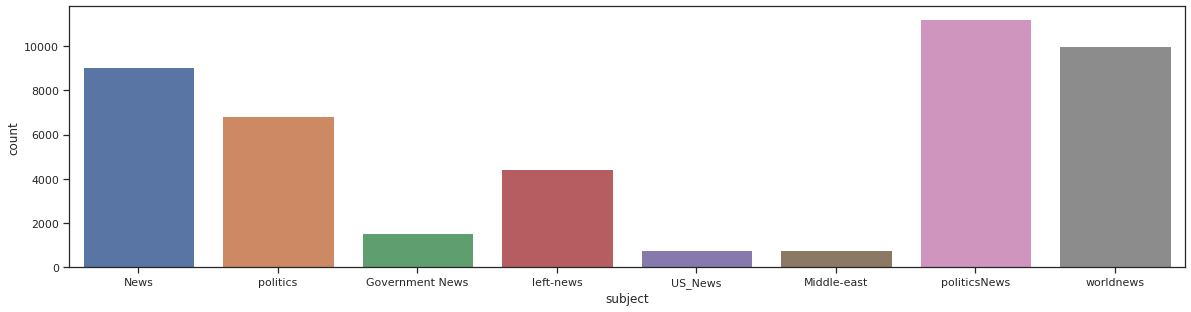

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
fig_dims=(20, 4.8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df_merged['subject'], ax=ax, data=df_merged);

Next part is labeling so that we will proceed to binary classification.



In [23]:
df_fake_news['label'] = 0
df_true_news['label'] = 1

**Merging into one dataset for training**

In [24]:
df_train = pd.merge(df_fake_news,df_true_news, how = 'outer')

**Using deep learning technique**

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

**Removing punctuation marks**

In [26]:
import string

In [27]:
from nltk.corpus import stopwords

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
def text_process(text):
  no_punctuation = [char for char in text if char not in string.punctuation]
  no_punctuation = ''.join(no_punctuation)
  return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

**Model creation and training**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train['title'], df_train['label'], test_size=0.2, random_state=42)

**MLP binary classifier** (Prediction)

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
from sklearn.pipeline import Pipeline

new_classifier = Pipeline([
('vectorizer', CountVectorizer(analyzer=text_process)),
('tfidf', TfidfTransformer()),
('classifier', MLPClassifier(solver='adam', activation='tanh', random_state=1, max_iter=200, early_stopping=True))
])

In [34]:
new_classifier.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer=<function text_process at 0x7f9548fe85f0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_ite

**Model evaluation**

In [35]:
predicted = new_classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report 

In [37]:
print(classification_report(predicted, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4731
           1       1.00      1.00      1.00      4207

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



**Saving and downloading your model** (.pkl File)

In [38]:
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [39]:
joblib.dump(new_classifier, 'model.pkl')

['model.pkl']

In [40]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [41]:
from googleapiclient.http import MediaFileUpload

file_metadata = {
    'name': 'model.pkl',
    'mimeType': 'text/plain'
}
media = MediaFileUpload('model.pkl', mimetype='text/plain', resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media, 
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1cgQKPwqiS4vzBPnqbU017QSwFX8MEq5I


**Model deployment**

In [42]:
news_title = ['Man has now landed on Mars']
prediction = new_classifier.predict(news_title)
print(prediction)

[0]


**All the packages used**

In [43]:
!pip list 

Package                       Version            
----------------------------- -------------------
absl-py                       0.12.0             
alabaster                     0.7.12             
albumentations                0.1.12             
altair                        4.1.0              
appdirs                       1.4.4              
argon2-cffi                   20.1.0             
arviz                         0.11.2             
astor                         0.8.1              
astropy                       4.2.1              
astunparse                    1.6.3              
async-generator               1.10               
atari-py                      0.2.9              
atomicwrites                  1.4.0              
attrs                         21.2.0             
audioread                     2.1.9              
autograd                      1.3                
Babel                         2.9.1              
backcall                      0.2.0              
